In [16]:
from src.ManuallySelectedFeatureSet import ManuallySelectedFeatureSet
from src.PcaFeatureSet import PcaFeatureSet
from src.model_runner import ModelRunner
from src.uci_har_dataset import UciHarDataset
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
dataset = UciHarDataset()

Loaded activity labels from data/UCI-HAR Dataset//activity_labels.txt
{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
Loaded feature names from data/UCI-HAR Dataset//features.txt
Loaded features from data/UCI-HAR Dataset/train/X_train.txt. Shape: (7352, 561)
Loaded labels from data/UCI-HAR Dataset/train/y_train.txt. Shape: (7352, 1)
Loaded features from data/UCI-HAR Dataset/test/X_test.txt. Shape: (2947, 561)
Loaded labels from data/UCI-HAR Dataset/test/y_test.txt. Shape: (2947, 1)


Selected features: train. Shape: (7352, 15)
Selected features: test. Shape: (2947, 15)
Scaled features using StandardScaler.
Accuracy on Model: 0.9016

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.91      0.96      0.93       496
  WALKING_UPSTAIRS       0.87      0.89      0.88       471
WALKING_DOWNSTAIRS       0.94      0.85      0.89       420
           SITTING       0.89      0.77      0.83       491
          STANDING       0.82      0.91      0.86       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.90      2947
         macro avg       0.90      0.90      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



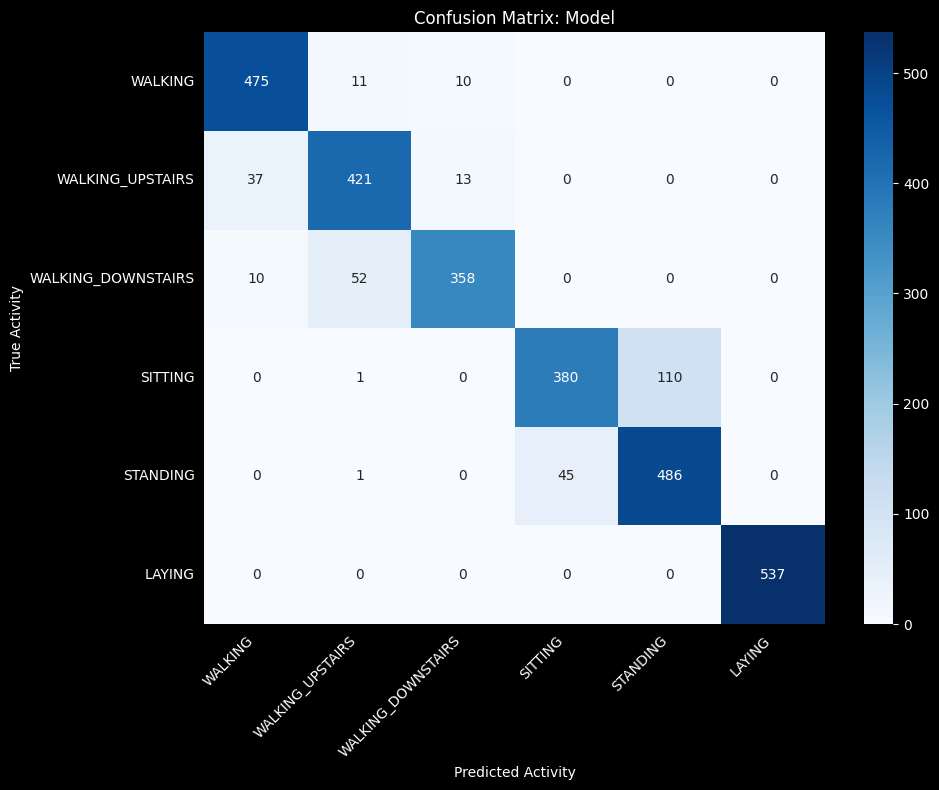

Calculating feature importance for Model...


<string>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



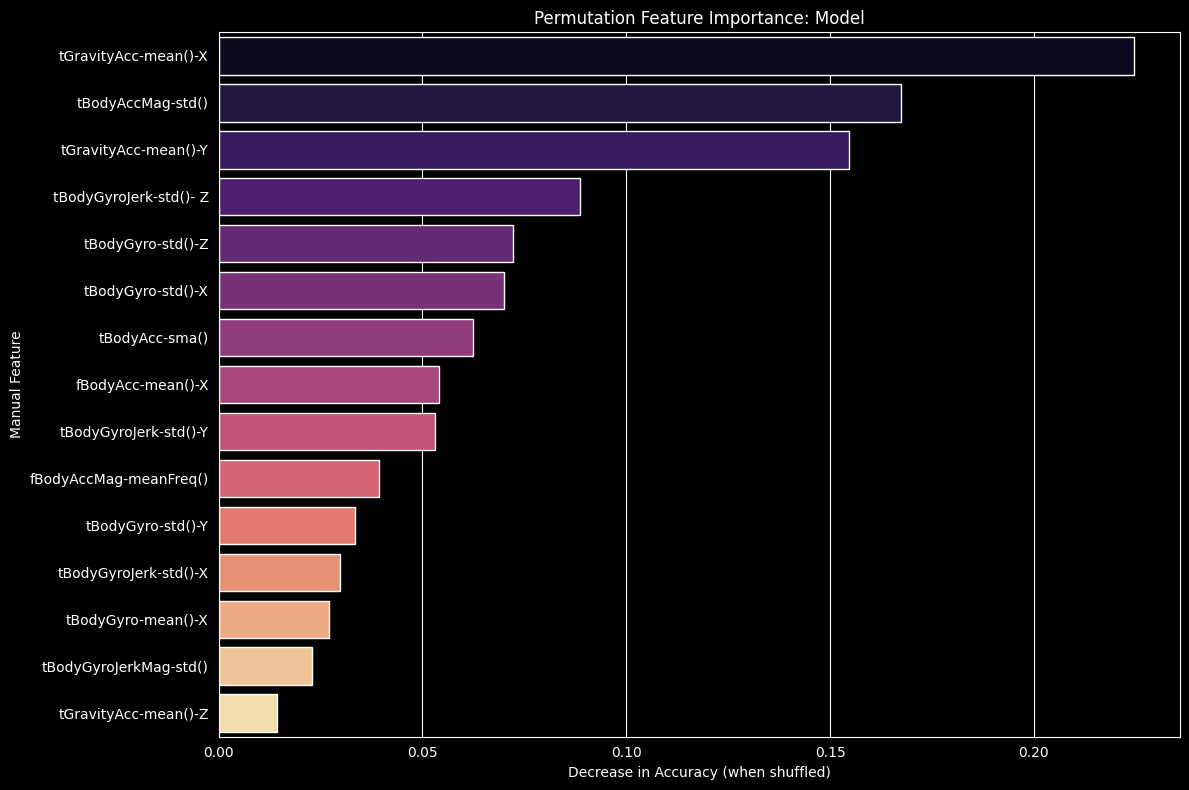

,Feature,Importance,Std
0,tGravityAcc-mean()-X,0.224601,0.004888
4,tBodyAccMag-std(),0.167323,0.003777
1,tGravityAcc-mean()-Y,0.154530,0.006744
7,tBodyGyroJerk-std()- Z,0.088565,0.002637
13,tBodyGyro-std()-Z,0.072107,0.004983
11,tBodyGyro-std()-X,0.069969,0.003682
3,tBodyAcc-sma(),0.062369,0.003000
9,fBodyAcc-mean()-X,0.053987,0.002909
6,tBodyGyroJerk-std()-Y,0.053003,0.005030
10,fBodyAccMag-meanFreq(),0.039430,0.002854


In [39]:
manual_features = ManuallySelectedFeatureSet(dataset)
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

runner = ModelRunner(dataset, feature_set=manual_features, model=svm)
runner.run()

runner.plot_confusion_matrix()
runner.plot_feature_importance()

Accuracy on Model: 0.9623

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.97      0.98      0.97       496
  WALKING_UPSTAIRS       0.93      0.97      0.95       471
WALKING_DOWNSTAIRS       0.99      0.93      0.96       420
           SITTING       0.98      0.90      0.94       491
          STANDING       0.92      0.98      0.95       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



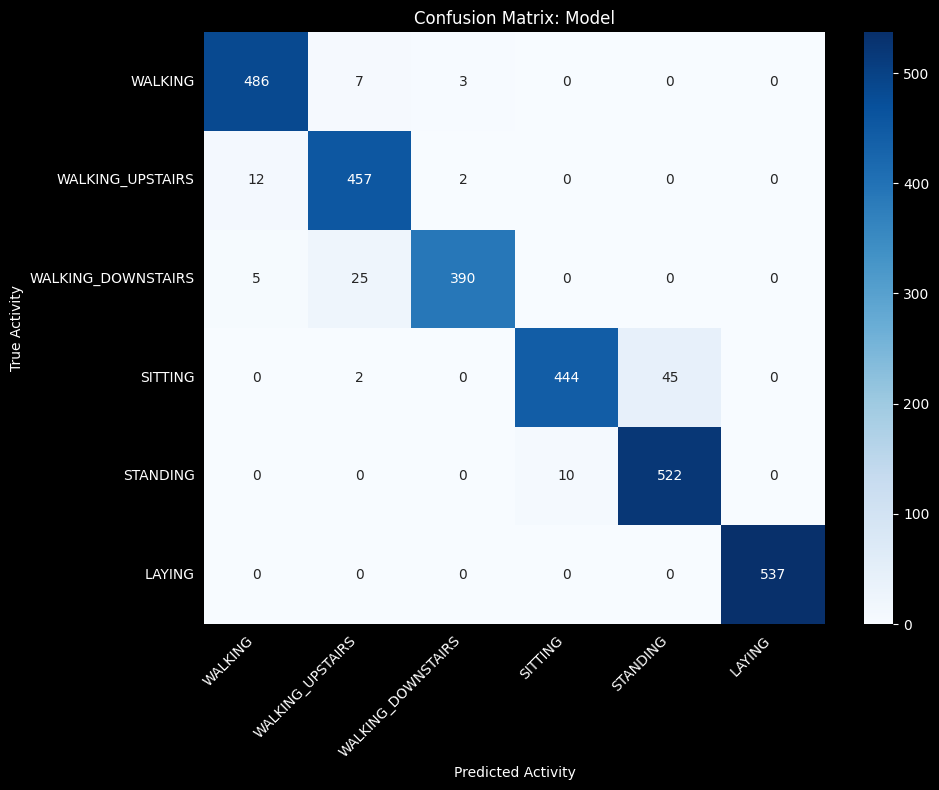

In [45]:
pca_features = PcaFeatureSet(dataset, n_components=None)
svm = SVC(kernel='rbf', C=10.0, gamma='scale')

pca_svm_runner = ModelRunner(dataset, feature_set=pca_features, model=svm)
pca_svm_runner.run()

pca_svm_runner.plot_confusion_matrix()
# pca_svm_runner.plot_feature_importance()